In [ ]:
!pip3 install sympy

In [2]:
from sympy import * 
from sympy.abc import * 
init_printing()

In [23]:
'''Найти MC, MR в дискретном случае'''
# MR = dTR / dQ
prices = [80, 70, 65, 60, 55, 50, 45]
quantity = [0, 10, 20, 30, 40, 50, 60]
total_cost = [1000, 1500, 1800, 1900, 2100, 2400, 2800]
MR = []
MC = []
profits = []
for i in range(len(prices))[1:]:
    dTR = prices[i] * quantity[i] - prices[i - 1] * quantity[i - 1]
    dTC = total_cost[i] - total_cost[i-1]
    dQ = quantity[i] - quantity[i-1]
    MR.append(dTR/dQ)
    MC.append(dTC/dQ)
    profits.append(prices[i] * quantity[i] - total_cost[i])
print(MR)
print(MC)
print(profits)

[70.0, 60.0, 50.0, 40.0, 30.0, 20.0]
[50.0, 30.0, 10.0, 20.0, 30.0, 40.0]
[-800, -500, -100, 100, 100, -100]


In [45]:
A, B = 14, 22
dp = - A
def E_DP(dq, dp, p, q): 
    '''Точечная эластичность спроса по цене'''
    return dq / dp * p / q
E_DP(-4, +3, 14, 21)

In [26]:
'''Эластичность по цене'''
MR = 120 - 2 * Q
MC = 20 + 3 * Q
D = 120 - Q
p = symbols('p')
solver = solve([MR - MC])
solver[symbols("P")] = D.subs(Q, solver[Q])
solver

In [27]:
Elasticity = diff(solve(D - p, Q)[0]) * solver[symbols("P")] / solver[symbols("Q")]
Elasticity

In [28]:
'''Индекс Лернера'''
Lerner = 1 / abs(Elasticity)
Lerner

In [29]:
'''Входные данные'''
Q_1, Q_2 = symbols('Q_1 Q_2')
P = 210 - 2 * (Q_1 + Q_2)
TC_1 = 3 * Q_1 ** 2 + 10 * Q_1 
TC_2 = 5 * Q_2 ** 2 


In [30]:
'''Модель Курно'''
profit_1 = P * Q_1 - TC_1
profit_2 = P * Q_2 - TC_2
BR_1 = solve(diff(profit_1, Q_1), Q_1)[0]
BR_2 = solve(diff(profit_2, Q_2), Q_2)[0]
solution = solve([BR_1 - Q_1, BR_2 - Q_2])
solution[symbols("P")] = P.subs(solution)
solution # {k:float(v) for k, v in solution.items()}

In [31]:
'''Модель Штакельберга'''
profit_1 = P * Q_1 - TC_1
BR_1 = solve(diff(profit_1, Q_1), Q_1)[0] # BR
profit_2 = (P * Q_2 - TC_2).subs(Q_1, BR_1) # subs in profit
BR_2 = solve(diff(profit_2, Q_2), Q_2)[0]
solution = solve([BR_1 - Q_1, BR_2 - Q_2])
solution[symbols("P")] = P.subs(solution)
solution # {k:float(v) for k, v in solution.items()}

In [32]:
'''Модель Бертрана''' 
# Некооперативная дуополия
profit_1 = P * Q_1 - TC_1
profit_2 = P * Q_2 - TC_2
MC_1 = diff(TC_1, Q_1)
MC_2 = diff(TC_2, Q_2)
solution = solve([P - MC_1, P - MC_2])
solution[symbols("P")] = P.subs(solution)
solution # {k:float(v) for k, v in solution.items()}

In [33]:
'''Модель Форхаймера''' 
# Есть доминирующая фирма. Я всё криво сделал, потому что не понял ничего.
solution = {}
profit_1 = P * Q_1 - TC_1
profit_2 = P * Q_2 - TC_2
MC_2 = diff(TC_2, Q_2)
Q_2o = solve(P - p, Q_1)[0].subs(Q_2, solve(p - MC_2, Q_2)[0])
solution[symbols("P")] = solve(Q_2o - Q_2, p)[0]
solution[symbols("Q_2")] = solve( # Угол наклона в 2 раза больше??!?
    solution[symbols("P")].subs(Q_2, 2 * Q_1) - diff(TC_1), Q_1)[0]
solution[symbols("P")] = solution[symbols("P")].subs(Q_2, solution[symbols("Q_2")])
solution[symbols("Q_1")] = solve(MC_2 - p, Q_2)[0].subs(p, solution[symbols("P")])
solution

In [39]:
'''Найти равновесную цену'''
Q_D = 60 - p
Q_S = 40 + 2 * p
solve(Q_D - Q_S)

In [42]:
'''Найти количество фирм'''
A, B = 14, 24
N = 10 * B
TC = A * q + 0.5 * q ** 2 + 1000
P = 6 * A
profit = P * q - TC
N * solve(diff(profit, q), q)[0]

In [36]:
5 * 12 * 10 * 29

In [ ]:
'''Задача с Робинзоном'''
# u = min(x, 4y)

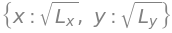

In [217]:
L_x, L_y = symbols('L_x L_y')
expr_x = sqrt(L_x)
expr_y = sqrt(L_y)
{x: expr_x, y: expr_y}

In [218]:
PPF = solve(expr_x - x, L_x)[0] + solve(expr_y - y, L_y)[0] - 200
PPF

In [221]:
solver = [d for d in solve([PPF.subs(y, x / 4), PPF.subs(x, y * 4)])
                                          if all(x > 0 for x in d.values())][0]
solver

In [222]:
MRT = (diff(PPF, x) / diff(PPF, y)).subs(x, solver[x]).subs(y, solver[y])
{symbols('MRT'): MRT}

In [223]:
'''Moral Hazard'''
w = 900
u = lambda x: sqrt(x)
e = (0, 1)
pi = (0.3, 0.1)


In [224]:
'''Second Best'''
u_1, IC_L, IC_R, IR, IC = symbols('u_1 IC_L IC_R IR IC')
dictionary = {u_1: (1 - pi[1]) * u(w) + pi[1] * u(alpha) - e[1] - beta,
            IC_L: pi[1] * u(alpha) + (1 - pi[1]) * u(w - beta) - e[1],
            IC_R: pi[0] * u(alpha) + (1 - pi[0]) * u(w - beta) - e[0]
             }
dictionary

In [225]:
dictionary[IR] = dictionary[IC_L] - dictionary[u_1].subs({alpha: 0, beta:0})
dictionary[IC] = dictionary[IC_L] - dictionary[IC_R]
dictionary.pop(IC_R)
dictionary.pop(IC_L)
dictionary

In [226]:
contract = solve([dictionary[IC], dictionary[IR]])[0]
contract

In [227]:
pi_1, pi_2 = symbols('pi_1 pi_2')
profits = {pi_1: 0, pi_2: 0}
profits[pi_1] = ((1 - pi[1]) * beta - pi[1] * alpha).subs(contract)
profits[pi_2] = ((1 - pi[0]) * beta - pi[0] * alpha).subs(contract)
profits

In [228]:
'''First-Best'''
fb_contract = solve([dictionary[IR], u(w - beta) - u(alpha)])[0]
fb_contract

In [229]:
profits = {pi_1: 0, pi_2: 0}
profits[pi_1] = ((1 - pi[1]) * beta - pi[1] * alpha).subs(fb_contract)
profits[pi_2] = ((1 - pi[0]) * beta - pi[0] * alpha).subs(fb_contract)
profits

In [230]:
'''Externalities'''
# X - норм. благо первой фирмы 
# 
c = x ** 2 / 2 + (4 - z) ** 2, \
    y ** 2 / 2 + z * y
p = 11, 14
profits = {pi_1: x * p[0] - c[0], 
           pi_2: y * p[1] - c[1]}
profits

In [231]:
solver = solve([diff(profits[pi_1], x), 
                diff(profits[pi_1], z), 
                diff(profits[pi_2], y)])
solver

In [232]:
'''Social Planner'''
pi_s = symbols('pi_s')
profits[pi_s] = profits[pi_1] + profits[pi_2]
soc_solver = solve([diff(profits[pi_s], x), 
                    diff(profits[pi_s], z), 
                    diff(profits[pi_s], y)])
soc_solver

In [233]:
'''Taxes'''
pi_1T, pi_2T = symbols('pi_1T pi_2T')
profits[pi_1T], profits[pi_2T]= x * p[0] - c[0] - q * z, \
                                y * p[1] - c[1] + q * z
{pi_1T: profits[pi_1T], pi_2T: profits[pi_2T]}

In [234]:
tax_solver = solve([profits[pi_2T].subs(soc_solver)])
tax_solver

In [235]:
'''Public Goods'''
w = 250, 250
u = 3 * ln(w[0] - x) + ln(x + y), \
    4 * ln(w[1] - y) + ln(x + y), 

'''independently and simultaneously'''
solve([diff(u[0], x), 
       diff(u[1], y)])

In [236]:
'''Social Planner'''
u_social = u[0] + u[1]
solve([diff(u_social, x),
       diff(u_social, y)])

In [237]:
'''VCG'''
import numpy as np 


def VCG(matrix):
    taxes = {chr(i + 65):0 for i in range(len(matrix))}
    net_benefits = taxes.copy()
    utilities = [(sum(i), x) for x, i in enumerate(matrix.T)]
    max_utility, n_opt = max(utilities, key=lambda x: x[0])
    for i, c in enumerate(taxes.keys()):
        exclude = np.vstack((matrix[:i], matrix[i + 1:]))
        exclude_alternatives = [(sum(i), x) for x, i in enumerate(exclude.T)]
        utility, n = max(exclude_alternatives, key=lambda x: x[0])
        if n != n_opt:
            taxes[c] = exclude_alternatives[n][0] - exclude_alternatives[n_opt][0]
        net_benefits[c] = max_utility - utility
    return {"Taxes":taxes,
            "Net Benefits": net_benefits}




example = np.array([
    [0, 350, 925, 490],
    [0, 370, 510, 950],
    [0, 140, 120, 270]
])

VCG(example)

{'Taxes': {'A': 0, 'B': 285, 'C': 0},
 'Net Benefits': {'A': 490, 'B': 665, 'C': 270}}